In [1]:
#@title $Start$
from IPython.display import HTML, Math, display

In [5]:
#@title $Enter \ \ the \ \ Function$ { form-width: "20%" }

import sympy as sp
import numpy as np

from sympy import fourier_series, pi
from sympy.abc import x
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

x = sp.symbols('x')
Fourier_Series_Type = "Full_Range" #@param ["Full_Range", "Half_Range_Cosine", "Half_Range_Sine"]
Partitions = 3 #@param {type:"slider", min:1, max:8, step:1}
fun=[]
fun_range=[]
for i in range(Partitions):
    expr = input('f(x) = ')
    expr = sp.sympify(expr)
    check=1
    while(check==1):
        if(Fourier_Series_Type != "Full_Range"):
            l_limit = sp.nsimplify(input("lower limit = "))
            u_limit = sp.nsimplify(input("upper limit = "))
            if(l_limit >= 0 and u_limit > l_limit):
                check=0
            else:
                print('Please enter correct range !')
                check=1
        else:
            l_limit = sp.nsimplify(input("lower limit = "))
            u_limit = sp.nsimplify(input("upper limit = "))
            if(u_limit > l_limit):
                check=0
            else:
                print('Please enter correct range !')
                check=1


    fun.append(expr)
    fun_range.append([l_limit,u_limit])

if(Fourier_Series_Type != "Full_Range"):
    T=2*(fun_range[-1][-1] - fun_range[0][0])
else:
    T = (fun_range[-1][-1] - fun_range[0][0])
L = T/2

expr = 0
for k in range(Partitions):
    expr = expr + sp.integrate((1/L)*fun[k],(x,fun_range[k][0],fun_range[k][1]))
#expr

if(Fourier_Series_Type == "Full_Range"):
    a0=sp.simplify(expr)
    #a0=round(float(a0),6)
elif(Fourier_Series_Type == "Half_Range_Cosine"):
    a0=sp.simplify(2*expr)

f(x) = 0
lower limit = -2
upper limit = -1
f(x) = 1
lower limit = -1
upper limit = 1
f(x) = 2
lower limit = 1
upper limit = 2


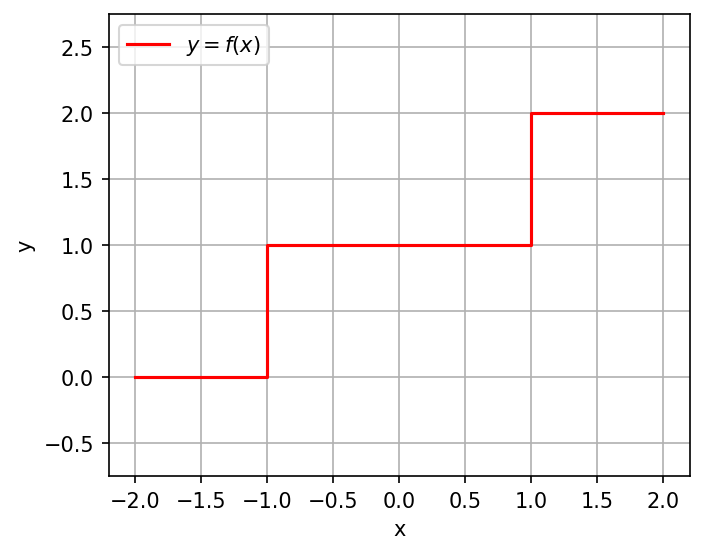

<IPython.core.display.Math object>

In [6]:
#@title $Given \ \ Function$
figure(num=None, figsize=(5,4), dpi=150, facecolor='w', edgecolor='k')

l=[]
u=[]
for i in range(Partitions):
    l.append(fun_range[i][0])
    u.append(fun_range[i][1])

Y_function = []
X_function = []
for i in range(Partitions):
    X_fun = np.linspace(float(l[i]),float(u[i]),int(600/Partitions))
    for j in range(len(X_fun)):
        Y_function.append(float(sp.limit(fun[i],x,X_fun[j])))
    X_function=X_function+list(X_fun)
plt.plot(X_function,Y_function,color='red',label='$y=f(x)$', linewidth=1.5)
plt.legend(loc='upper left')
plt.xlabel("x")
plt.ylabel("y")
plt.axis('equal')
plt.grid()
plt.show()
#plt.plot([min(X_function),max(X_function)],[0,0],color='black',linewidth='1') # x-axis
#plt.plot([0,0],[0,max(Y_function)],color='black',linewidth='1') # y-axis


expr = r"f(x)=\left\{ \begin{matrix}"
for i in range(Partitions):
    expr=expr+sp.latex(fun[i])+r" & : & "+sp.latex(fun_range[i][0])+r" \leq "+r" x "+r" \leq "+sp.latex(fun_range[i][1])
    if(i < (Partitions-1)):
        expr=expr+r" \\ "
expr=expr+r" \end{matrix} \right."
display(Math(r"\Large{ "+expr+r"}"))
print()

In [7]:
#@title $No. \ \ of \ \ Fourier \ \ Coefficients$
m=int(input('Number of fourier coefficients = '))

#from sympy import *
if(Fourier_Series_Type != "Half_Range_Sine"):
    a0=0
    for k in range(Partitions):
        a0 = a0 + sp.simplify(sp.integrate((1/L)*fun[k],(x,fun_range[k][0],fun_range[k][1])))
a = []
b = []
for i in range(1,m+1):
    expr1 = 0
    expr2 = 0
    for k in range(Partitions):
        if(Fourier_Series_Type == "Half_Range_Cosine"):
            expr1 = expr1 + sp.simplify(sp.integrate((1/L)*fun[k]*sp.cos(i*pi*x/L),(x,fun_range[k][0],fun_range[k][1])))
        elif(Fourier_Series_Type == "Half_Range_Sine"):
            expr2 = expr2 + sp.simplify(sp.integrate((1/L)*fun[k]*sp.sin(i*pi*x/L),(x,fun_range[k][0],fun_range[k][1])))
        else:
            expr1 = expr1 + sp.simplify(sp.integrate((1/L)*fun[k]*sp.cos(i*pi*x/L),(x,fun_range[k][0],fun_range[k][1])))
            expr2 = expr2 + sp.simplify(sp.integrate((1/L)*fun[k]*sp.sin(i*pi*x/L),(x,fun_range[k][0],fun_range[k][1])))

    if(Fourier_Series_Type == "Half_Range_Cosine"):
        a.append(sp.simplify(2*expr1))
    elif(Fourier_Series_Type == "Half_Range_Sine"):
        b.append(sp.simplify(2*expr2))
    else:
        a.append(sp.simplify(expr1))
        b.append(sp.simplify(expr2))

Number of fourier coefficients = 10


In [8]:
#@title $Fourier \ \ Coefficients$

n=sp.symbols('n')
if(Fourier_Series_Type == "Full_Range" or Fourier_Series_Type == "Half_Range_Cosine"):
    a_0=0
    for i in range(Partitions):
        a_0 = a_0 + sp.simplify((1/L)*sp.integrate(fun[i],(x,fun_range[i][0],fun_range[i][1])))
    if(Fourier_Series_Type == "Half_Range_Cosine"):
        display(Math('\Large{ a_0 = '+sp.latex(2*a0)+'}'))
    else:
        display(Math('\Large{ a_0 = '+sp.latex(a0)+'}'))

    print()

    an = 0
    for i in range(Partitions):
        an = an + sp.simplify((1/L)*sp.integrate(fun[i]*sp.cos(n*pi*x/L),(x,fun_range[i][0],fun_range[i][1])))
    an = sp.expand(sp.simplify(an))
    if(Fourier_Series_Type == "Half_Range_Cosine"):
        display(Math('\Large{ a_n = '+sp.latex(2*an)+'}'))
    else:
        display(Math('\Large{ a_n = '+sp.latex(an)+'}'))

if(Fourier_Series_Type == "Full_Range" or Fourier_Series_Type == "Half_Range_Sine"):
    bn = 0
    for i in range(Partitions):
        bn = bn + sp.simplify((1/L)*sp.integrate(fun[i]*sp.sin(n*pi*x/L),(x,fun_range[i][0],fun_range[i][1])))
    bn = sp.expand(sp.simplify(bn))
    if(Fourier_Series_Type == "Half_Range_Sine"):
        display(Math('\Large{ b_n = '+sp.latex(2*bn)+'}'))
    else:
        print()
        display(Math('\Large{ b_n = '+sp.latex(bn)+'}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [9]:
#@title $Fourier \ \ Series \ \ Representation$

if(Fourier_Series_Type != "Half_Range_Sine"):
    if(Fourier_Series_Type == "Full_Range"):
        FS_expr=sp.latex(a0/2)
        for i in range(m):
            FS_expr=FS_expr + r'+ \left [ '
            FS_expr = FS_expr+r'\left('+sp.latex(a[i])+r'\right)'+sp.latex(sp.cos((i+1)*pi*x/L))+r'+'+r'\left('+sp.latex(b[i])+r'\right)'+sp.latex(sp.sin((i+1)*pi*x/L))+ r' \right ]'
    else:
        FS_expr=sp.latex(a0)
        for i in range(m):
            FS_expr=FS_expr + r'+ \left [ '
            FS_expr = FS_expr+r'\left('+sp.latex(a[i])+r'\right)'+sp.latex(sp.cos((i+1)*pi*x/L))+r' \right ]'
else:
    FS_expr=''
    for i in range(m):
        FS_expr=FS_expr + r'\left [ '
        FS_expr = FS_expr+r'\left('+sp.latex(b[i])+r'\right)'+sp.latex(sp.sin((i+1)*pi*x/L))+ r' \right ]+'

display(Math(r'\large{'+r'f(x) \approx'+FS_expr+r'}'))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

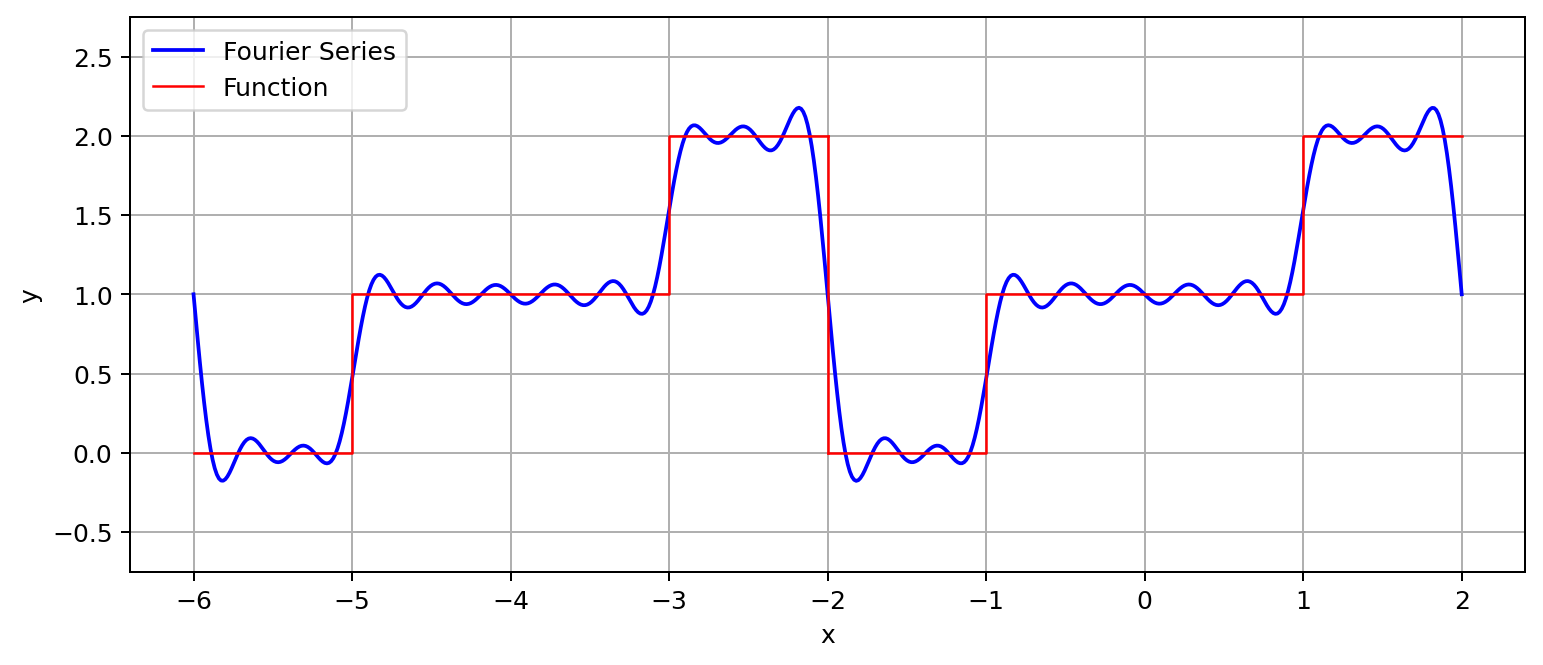

In [10]:
#@title $Graphical \ \ Representation$

def fourier_series(X_fs,m,a0,a,b,L):
    expr = a0/2
    for i in range(m):
        expr=expr+(float(a[i])*np.cos((i+1)*np.pi*X_fs/float(L)))+(float(b[i])*np.sin((i+1)*np.pi*X_fs/float(L)))
    return(expr)
def fourier_cosine_series(X_fs,m,a0,a,L):
    expr = a0
    for i in range(m):
        expr=expr+(float(a[i])*np.cos((i+1)*np.pi*X_fs/float(L)))
    return(expr)
def fourier_sine_series(X_fs,m,b,L):
    expr = 0
    for i in range(m):
        expr=expr+(float(b[i])*np.sin((i+1)*np.pi*X_fs/float(L)))
    return(expr)

figure(num=None, figsize=(10,4), dpi=180, facecolor='w', edgecolor='k')

if(Fourier_Series_Type == "Full_Range"):
    X_fs=np.linspace(float(2*fun_range[0][0]-fun_range[-1][-1]),float(fun_range[-1][-1]),600)
    plt.plot(X_fs,fourier_series(X_fs,m,a0,a,b,L), color='blue',label='Fourier Series',linewidth=1.5)
elif(Fourier_Series_Type == "Half_Range_Cosine"):
    X_fs=np.linspace(float(fun_range[0][0]),float(fun_range[-1][-1]),600)
    plt.plot(X_fs,fourier_cosine_series(X_fs,m,a0,a,L), color='blue',label='Fourier Series',linewidth=1.5)

    X_fs=np.linspace(float(fun_range[0][0]-2*fun_range[-1][-1]),float(fun_range[0][0]-fun_range[-1][-1]),600)
    plt.plot(X_fs,fourier_cosine_series(X_fs,m,a0,a,L), color='blue',linewidth=1.5)

    X_fs=np.linspace(float(2*fun_range[-1][-1]-fun_range[0][0]),float(3*fun_range[-1][-1]),600)
    plt.plot(X_fs,fourier_cosine_series(X_fs,m,a0,a,L), color='blue',linewidth=1.5)

    X_fs=np.linspace(float(fun_range[0][0]-fun_range[-1][-1]),float(fun_range[0][0]),600)
    plt.plot(X_fs,fourier_cosine_series(X_fs,m,a0,a,L), color='blue',linewidth=0.2)

    X_fs=np.linspace(float(fun_range[-1][-1]),float(2*fun_range[-1][-1]-fun_range[0][0]),600)
    plt.plot(X_fs,fourier_cosine_series(X_fs,m,a0,a,L), color='blue',linewidth=0.2)
else:
    X_fs=np.linspace(float(fun_range[0][0]),float(fun_range[-1][-1]),600)
    plt.plot(X_fs,fourier_sine_series(X_fs,m,b,L), color='blue',label='Fourier Series',linewidth=1.5)

    X_fs=np.linspace(float(fun_range[0][0]-2*fun_range[-1][-1]),float(fun_range[0][0]-fun_range[-1][-1]),600)
    plt.plot(X_fs,fourier_sine_series(X_fs,m,b,L), color='blue',linewidth=1.5)

    X_fs=np.linspace(float(2*fun_range[-1][-1]-fun_range[0][0]),float(3*fun_range[-1][-1]),600)
    plt.plot(X_fs,fourier_sine_series(X_fs,m,b,L), color='blue',linewidth=1.5)

    X_fs=np.linspace(float(fun_range[0][0]-fun_range[-1][-1]),float(fun_range[0][0]),600)
    plt.plot(X_fs,fourier_sine_series(X_fs,m,b,L), color='blue',linewidth=0.2)

    X_fs=np.linspace(float(fun_range[-1][-1]),float(2*fun_range[-1][-1]-fun_range[0][0]),600)
    plt.plot(X_fs,fourier_sine_series(X_fs,m,b,L), color='blue',linewidth=0.2)

if(Fourier_Series_Type == "Full_Range"):
    Y_function = []
    X_function = []
    for i in range(Partitions):
        X_fun = np.linspace(float(l[i]),float(u[i]),int(600/Partitions))
        for j in range(len(X_fun)):
            Y_function.append(float(sp.limit(fun[i],x,X_fun[j])))
        X_function=X_function+list(X_fun)
    plt.plot(X_function,Y_function,color='red',label='Function',linewidth=1)

    X1_function = []
    for i in range(Partitions):
        X_fun1 = np.linspace(float(l[i]-T),float(l[i]-T+u[i]-l[i]),int(600/Partitions))
        X1_function=X1_function+list(X_fun1)
    plt.plot(X1_function,Y_function,color='red', linewidth=1)

    # Join two parts
    plt.plot([X1_function[-1], X_function[0]], [Y_function[-1], Y_function[0]], color='red', linewidth=1)

elif(Fourier_Series_Type == "Half_Range_Cosine"):
    X_function = []
    Y_function = []
    Xn_function=[]
    Yn_function=[]
    for i in range(Partitions):
        X_fun = np.linspace(float(l[i]),float(u[i]),int(600/Partitions))
        for j in range(len(X_fun)):
            Y_function.append(float(sp.limit(fun[i],x,X_fun[j])))
        X_function=X_function+list(X_fun)
    plt.plot(X_function,Y_function,color='red',label='Function',linewidth=1)

    X1_function = []
    for i in range(Partitions):
        X_fun1 = np.linspace(float(l[i]-T),float(l[i]-T+u[i]-l[i]),int(600/Partitions))
        X1_function=X1_function+list(X_fun1)
    plt.plot(X1_function,Y_function,color='red',linewidth=1)

    X2_function = []
    for i in range(Partitions):
        X_fun1 = np.linspace(float(l[i]+T),float(l[i]+T+u[i]-l[i]),int(600/Partitions))
        X2_function=X2_function+list(X_fun1)
    plt.plot(X2_function,Y_function,color='red',linewidth=1)

elif(Fourier_Series_Type == "Half_Range_Sine"):
    Y_function = []
    X_function = []
    for i in range(Partitions):
        X_fun = np.linspace(float(l[i]),float(u[i]),int(600/Partitions))
        for j in range(len(X_fun)):
            Y_function.append(float(sp.limit(fun[i],x,X_fun[j])))
        X_function=X_function+list(X_fun)
    plt.plot(X_function,Y_function,color='red',label='Function',linewidth=1)

    X1_function = []
    for i in range(Partitions):
        X_fun1 = np.linspace(float(l[i]-T),float(l[i]-T+u[i]-l[i]),int(600/Partitions))
        X1_function=X1_function+list(X_fun1)
    plt.plot(X1_function,Y_function,color='red',linewidth=1)

    X2_function = []
    for i in range(Partitions):
        X_fun1 = np.linspace(float(l[i]+T),float(l[i]+T+u[i]-l[i]),int(600/Partitions))
        X2_function=X2_function+list(X_fun1)
    plt.plot(X2_function,Y_function,color='red',linewidth=1)


plt.legend(loc='upper left')
display(Math(r"Approximation \ \ of \ \ f(x) \ \ by \ \ Sine \ \ waves"))

plt.xlabel("x")
plt.ylabel("y")
plt.axis('equal')
plt.grid()
plt.show()

<IPython.core.display.Math object>

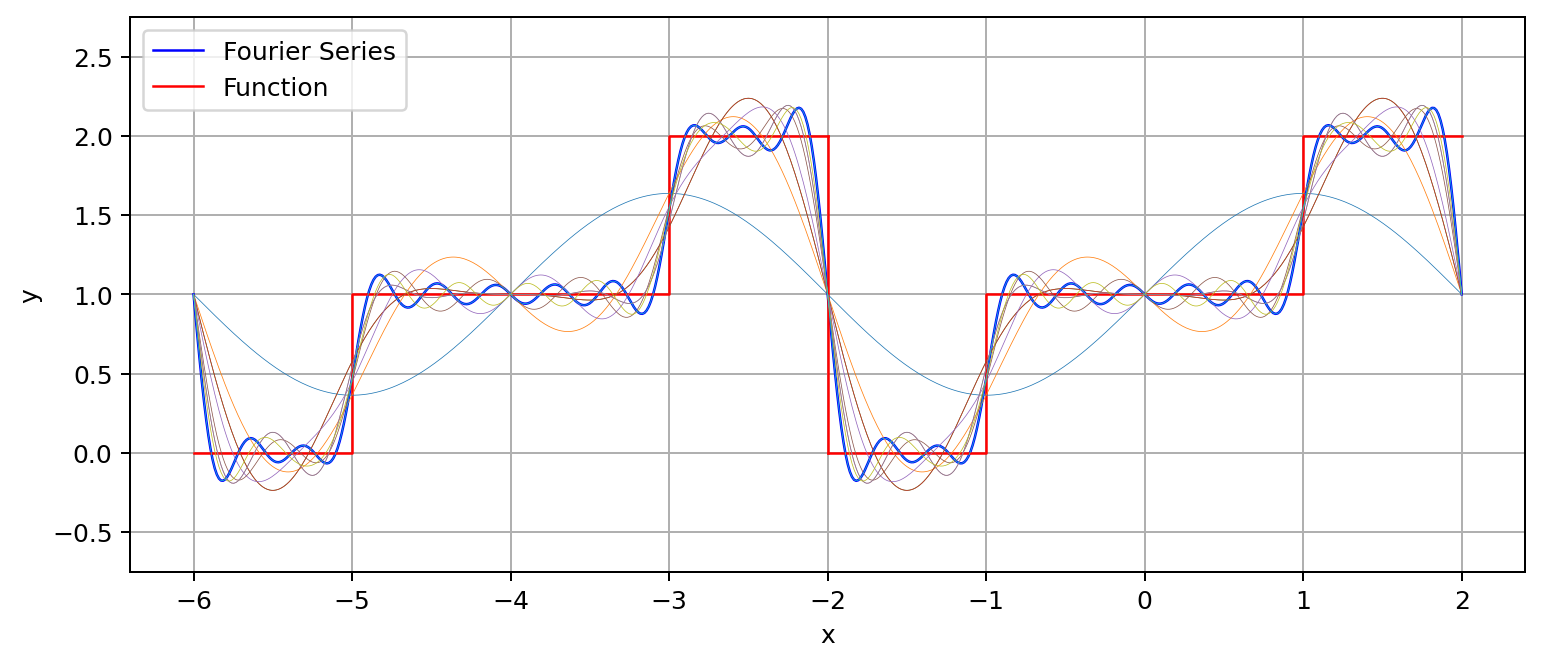

In [11]:
#@title $Sine \ \ Waves \ \ $

def fourier_series(X_fs,m,a0,a,b,L):
    expr = a0/2
    for i in range(m):
        expr=expr+(float(a[i])*np.cos((i+1)*np.pi*X_fs/float(L)))+(float(b[i])*np.sin((i+1)*np.pi*X_fs/float(L)))
    return(expr)
def fourier_cosine_series(X_fs,m,a0,a,L):
    expr = a0
    for i in range(m):
        expr=expr+(float(a[i])*np.cos((i+1)*np.pi*X_fs/float(L)))
    return(expr)
def fourier_sine_series(X_fs,m,b,L):
    expr = 0
    for i in range(m):
        expr=expr+(float(b[i])*np.sin((i+1)*np.pi*X_fs/float(L)))
    return(expr)

figure(num=None, figsize=(10,4), dpi=180, facecolor='w', edgecolor='k')


if(Fourier_Series_Type == "Full_Range"):
    X_fs=np.linspace(float(2*fun_range[0][0]-fun_range[-1][-1]),float(fun_range[-1][-1]),600)
    plt.plot(X_fs,fourier_series(X_fs,m,a0,a,b,L), color='blue',label='Fourier Series',linewidth=1)
elif(Fourier_Series_Type == "Half_Range_Cosine"):
    X_fs3=np.linspace(float(fun_range[0][0]),float(fun_range[-1][-1]),600)
    plt.plot(X_fs3,fourier_cosine_series(X_fs3,m,a0,a,L), color='blue',label='Fourier Series',linewidth=1)

    X_fs1=np.linspace(float(fun_range[0][0]-2*fun_range[-1][-1]),float(fun_range[0][0]-fun_range[-1][-1]),600)
    plt.plot(X_fs1,fourier_cosine_series(X_fs1,m,a0,a,L), color='blue',linewidth=1)

    X_fs5=np.linspace(float(2*fun_range[-1][-1]-fun_range[0][0]),float(3*fun_range[-1][-1]),600)
    plt.plot(X_fs5,fourier_cosine_series(X_fs5,m,a0,a,L), color='blue',linewidth=1)

    X_fs2=np.linspace(float(fun_range[0][0]-fun_range[-1][-1]),float(fun_range[0][0]),600)
    plt.plot(X_fs2,fourier_cosine_series(X_fs2,m,a0,a,L), color='blue',linewidth=0.2)

    X_fs4=np.linspace(float(fun_range[-1][-1]),float(2*fun_range[-1][-1]-fun_range[0][0]),600)
    plt.plot(X_fs4,fourier_cosine_series(X_fs4,m,a0,a,L), color='blue',linewidth=0.2)
else:
    X_fs=np.linspace(float(fun_range[0][0]),float(fun_range[-1][-1]),600)
    plt.plot(X_fs,fourier_sine_series(X_fs,m,b,L), color='blue',label='Fourier Series',linewidth=1)

    X_fs=np.linspace(float(fun_range[0][0]-2*fun_range[-1][-1]),float(fun_range[0][0]-fun_range[-1][-1]),600)
    plt.plot(X_fs,fourier_sine_series(X_fs,m,b,L), color='blue',linewidth=1)

    X_fs=np.linspace(float(2*fun_range[-1][-1]-fun_range[0][0]),float(3*fun_range[-1][-1]),600)
    plt.plot(X_fs,fourier_sine_series(X_fs,m,b,L), color='blue',linewidth=1)

    X_fs=np.linspace(float(fun_range[0][0]-fun_range[-1][-1]),float(fun_range[0][0]),600)
    plt.plot(X_fs,fourier_sine_series(X_fs,m,b,L), color='blue',linewidth=0.2)

    X_fs=np.linspace(float(fun_range[-1][-1]),float(2*fun_range[-1][-1]-fun_range[0][0]),600)
    plt.plot(X_fs,fourier_sine_series(X_fs,m,b,L), color='blue',linewidth=0.2)


if(Fourier_Series_Type == "Full_Range"):
    Y_function = []
    X_function = []
    for i in range(Partitions):
        X_fun = np.linspace(float(l[i]),float(u[i]),int(600/Partitions))
        for j in range(len(X_fun)):
            Y_function.append(float(sp.limit(fun[i],x,X_fun[j])))
        X_function=X_function+list(X_fun)
    plt.plot(X_function,Y_function,color='red',label='Function',linewidth=1)

    X1_function = []
    for i in range(Partitions):

        X_fun1 = np.linspace(float(l[i]-T),float(l[i]-T+u[i]-l[i]),int(600/Partitions))
        X1_function=X1_function+list(X_fun1)
    plt.plot(X1_function,Y_function,color='red', linewidth=1)

    # Join two parts
    plt.plot([X1_function[-1], X_function[0]], [Y_function[-1], Y_function[0]], color='red', linewidth=1)

    # Plot components
    Y=np.zeros(len(X_fs))
    Y=Y+a0/2
    #plt.plot(X_fs,Y, color='red',linewidth=0.2)
    for i in range(len(a)):
        #Y=Y+a0/2
        Y = Y+ a[i]*np.cos(((i+1)*np.pi*X_fs)/float(L)) + b[i]*np.sin(((i+1)*np.pi*X_fs)/float(L))
        plt.plot(X_fs,Y,linewidth=0.3)
    # for i in range(len(b)):
    #     if(b[i]!=0):
    #         Y = Y+ b[i]*np.sin(((i+1)*np.pi*X_fs)/float(L))
    #         plt.plot(X_fs,Y,linewidth=0.3)


elif(Fourier_Series_Type == "Half_Range_Cosine"):
    X_function = []
    Y_function = []
    Xn_function=[]
    Yn_function=[]
    for i in range(Partitions):
        X_fun = np.linspace(float(l[i]),float(u[i]),int(600/Partitions))
        for j in range(len(X_fun)):
            Y_function.append(float(sp.limit(fun[i],x,X_fun[j])))
        X_function=X_function+list(X_fun)
    plt.plot(X_function,Y_function,color='red',label='Function',linewidth=1)

    X1_function = []
    for i in range(Partitions):
        X_fun1 = np.linspace(float(l[i]-T),float(l[i]-T+u[i]-l[i]),int(600/Partitions))
        X1_function=X1_function+list(X_fun1)
    plt.plot(X1_function,Y_function,color='red',linewidth=1)

    X2_function = []
    for i in range(Partitions):
        X_fun1 = np.linspace(float(l[i]+T),float(l[i]+T+u[i]-l[i]),int(600/Partitions))
        X2_function=X2_function+list(X_fun1)
    plt.plot(X2_function,Y_function,color='red',linewidth=1)

    # Plot components
    Y=np.zeros(len(X_fs))
    Y=Y+a0/2
    #plt.plot(X_fs,Y, color='red',linewidth=0.2)
    for i in range(len(a)):
        #Y=Y+a0/2
        Y = Y + a[i]*np.cos(((i+1)*np.pi*X_fs)/float(L))
        plt.plot(X_fs,Y,linewidth=0.3)
    # for i in range(len(b)):
    #     if(b[i]!=0):
    #         Y = Y+ b[i]*np.sin(((i+1)*np.pi*X_fs)/float(L))
    #         plt.plot(X_fs,Y,linewidth=0.3)

elif(Fourier_Series_Type == "Half_Range_Sine"):
    Y_function = []
    X_function = []
    for i in range(Partitions):
        X_fun = np.linspace(float(l[i]),float(u[i]),int(600/Partitions))
        for j in range(len(X_fun)):
            Y_function.append(float(sp.limit(fun[i],x,X_fun[j])))
        X_function=X_function+list(X_fun)
    plt.plot(X_function,Y_function,color='red',label='Function',linewidth=1)

    X1_function = []
    for i in range(Partitions):
        X_fun1 = np.linspace(float(l[i]-T),float(l[i]-T+u[i]-l[i]),int(600/Partitions))
        X1_function=X1_function+list(X_fun1)
    plt.plot(X1_function,Y_function,color='red',linewidth=1)

    X2_function = []
    for i in range(Partitions):
        X_fun1 = np.linspace(float(l[i]+T),float(l[i]+T+u[i]-l[i]),int(600/Partitions))
        X2_function=X2_function+list(X_fun1)
    plt.plot(X2_function,Y_function,color='red',linewidth=1)



plt.legend(loc='upper left')
display(Math(r"Approximation \ \ of \ \ f(x) \ \ by \ \ Sine \ \ waves"))

plt.xlabel("x")
plt.ylabel("y")
plt.axis('equal')
plt.grid()
plt.show()

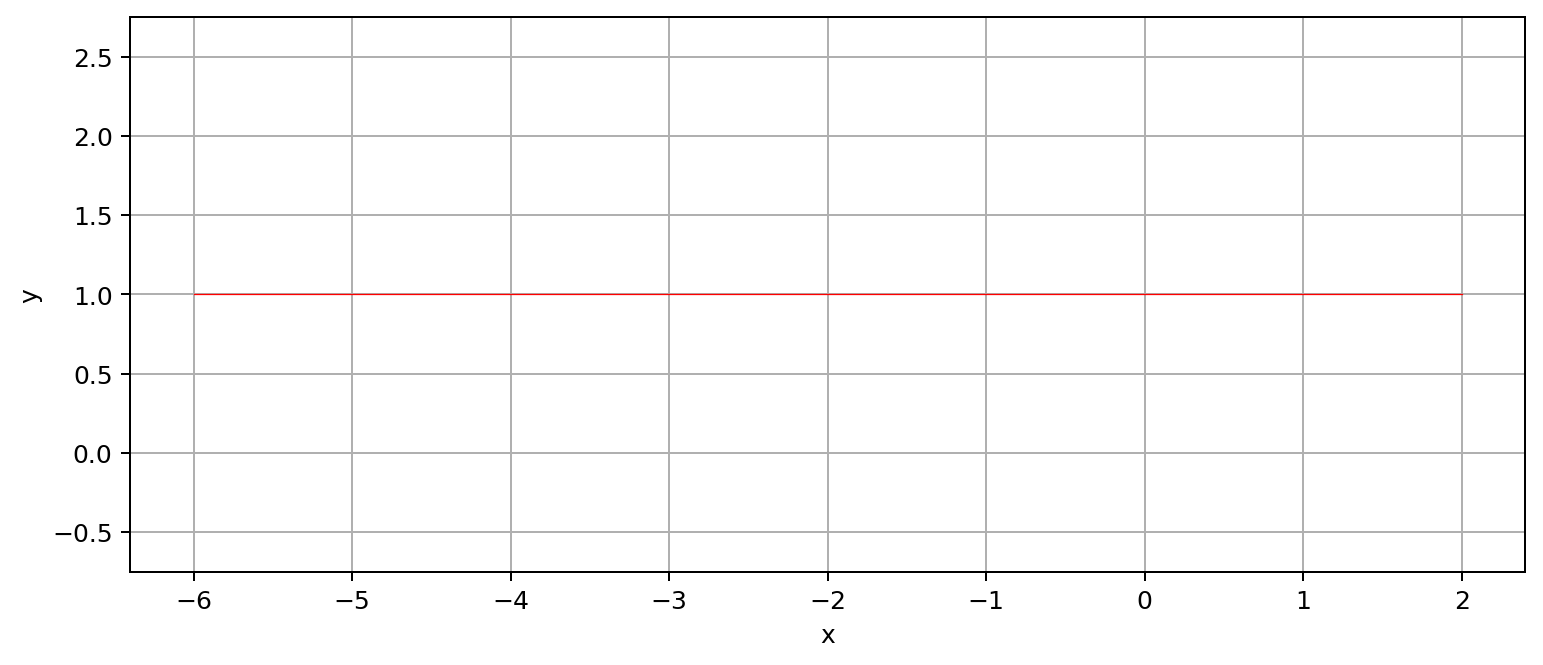

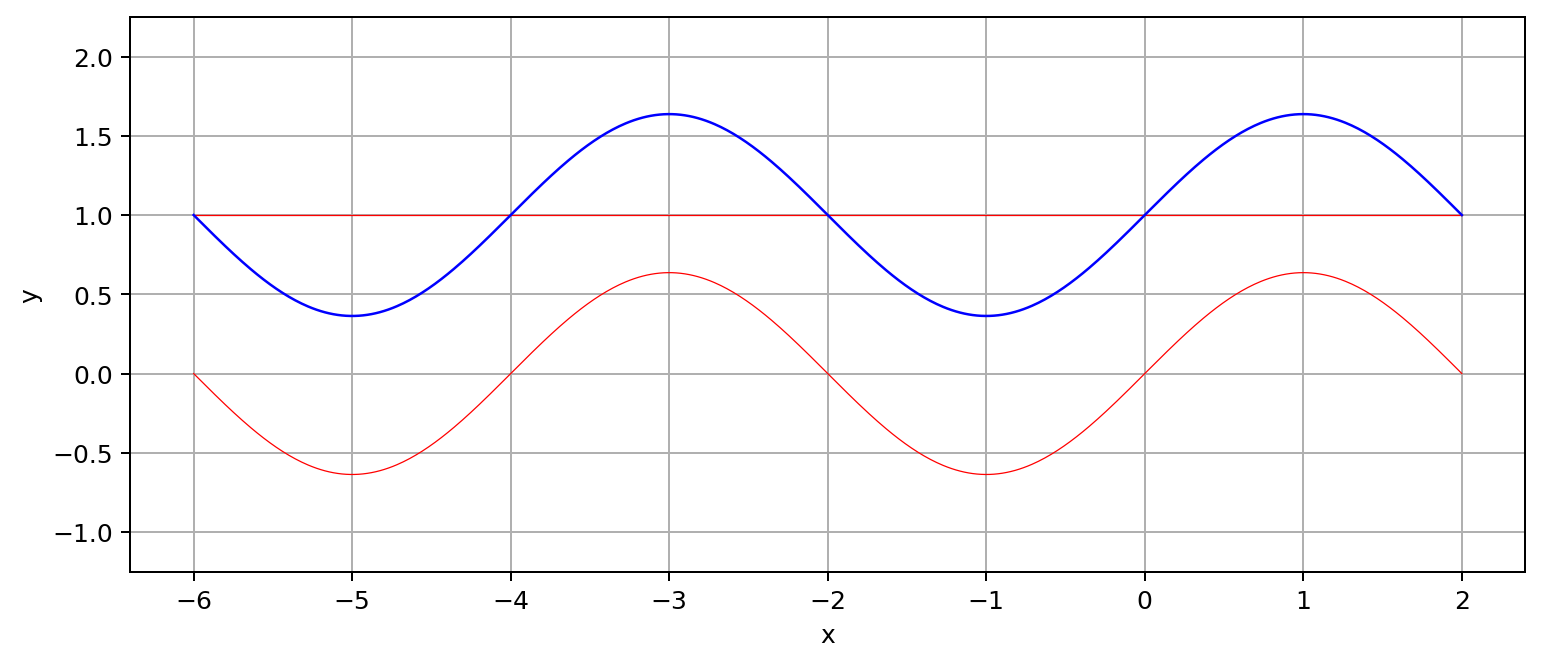

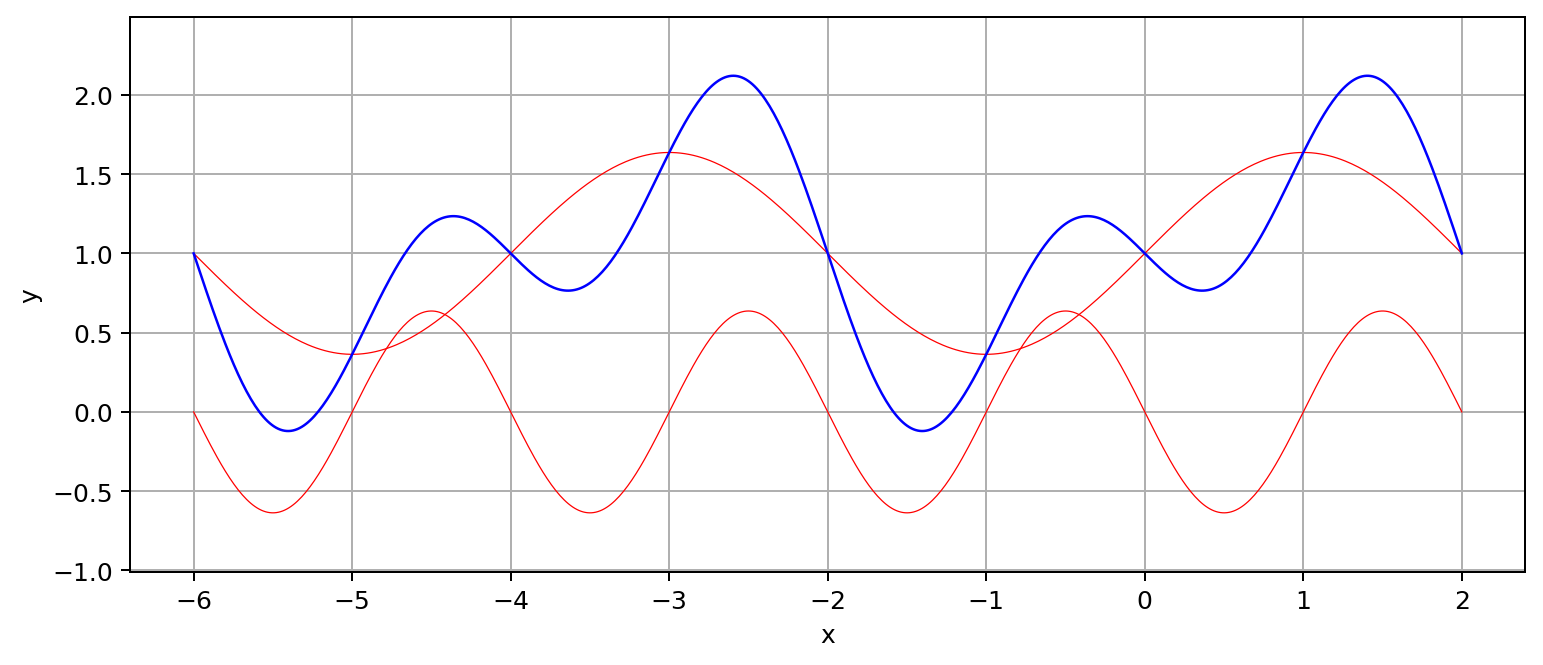

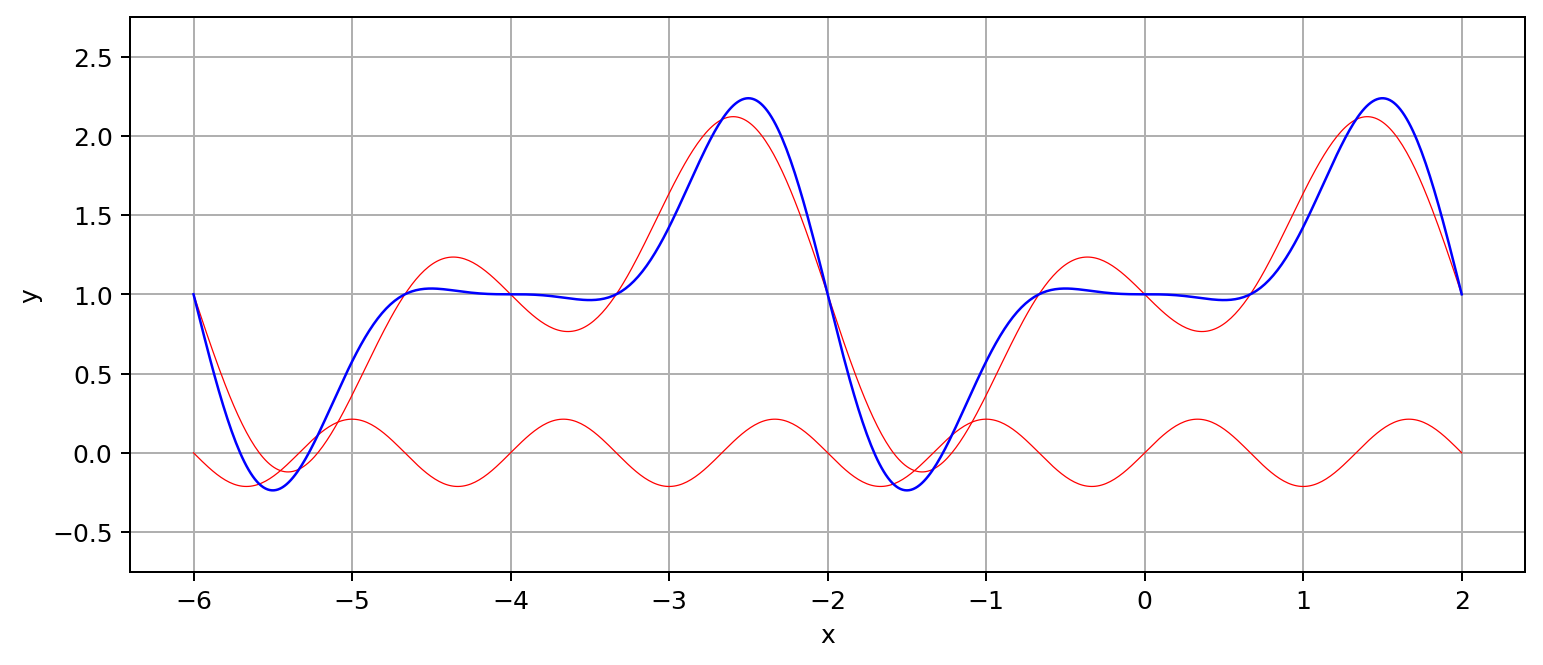

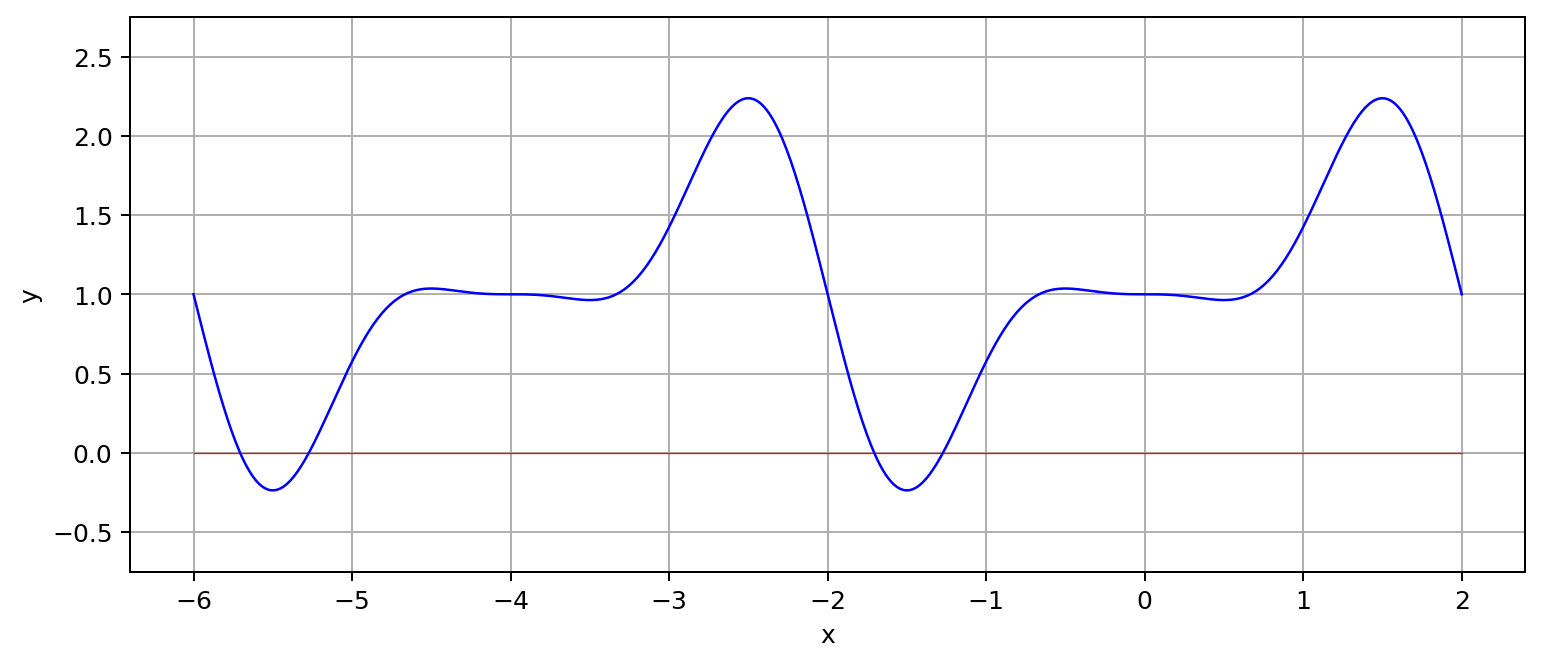

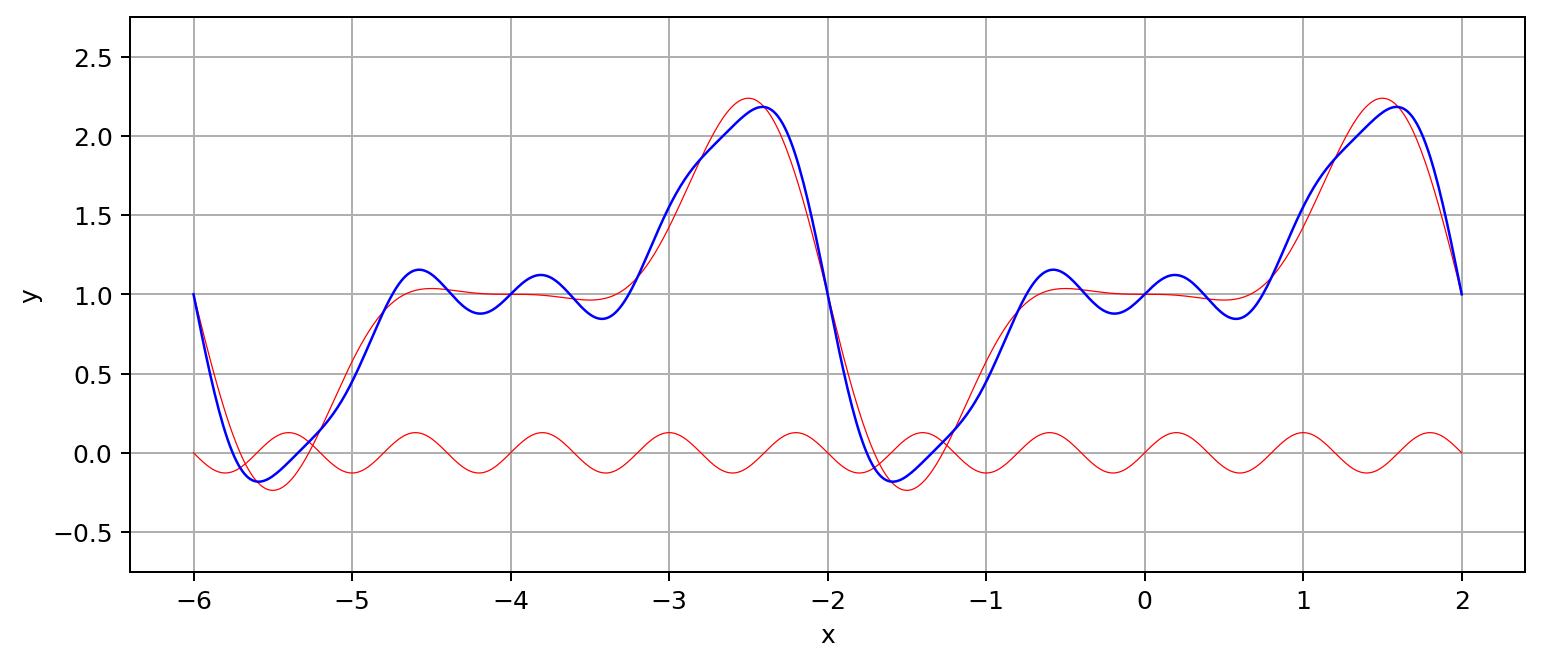

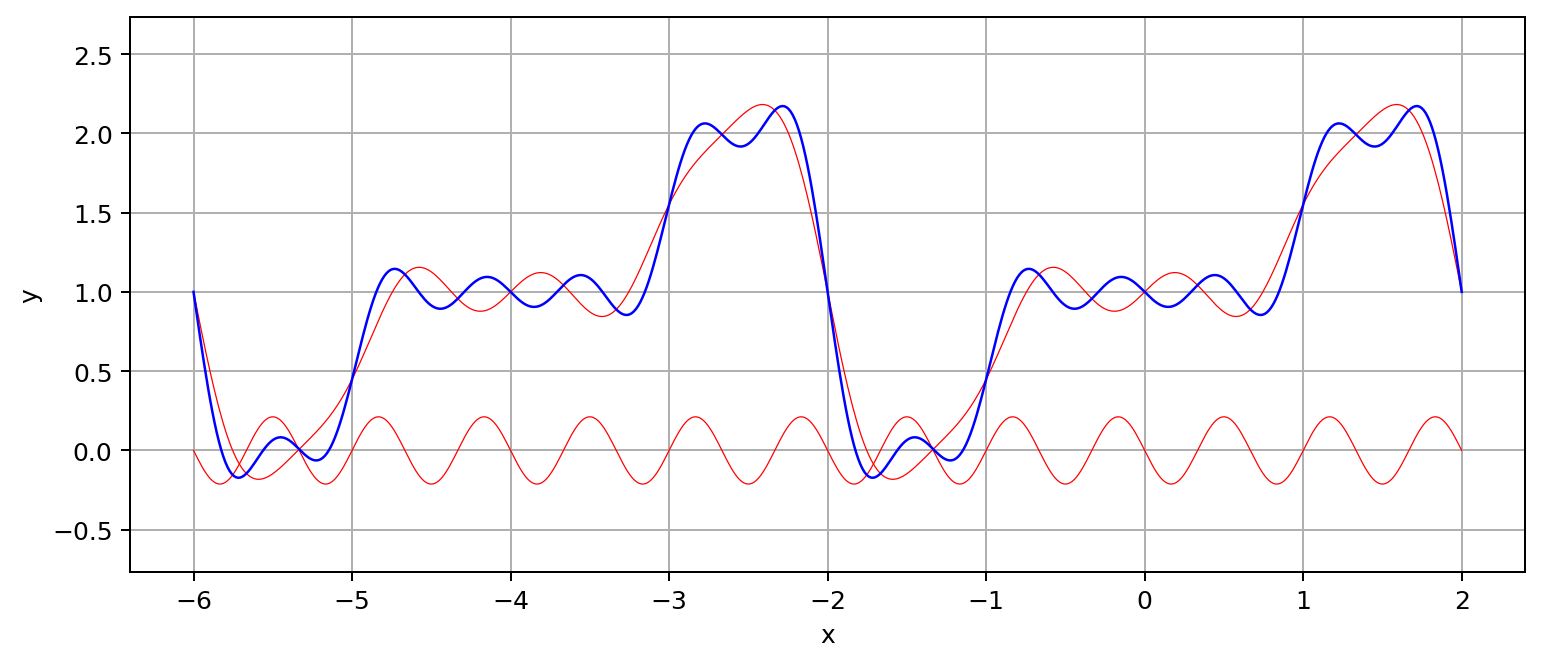

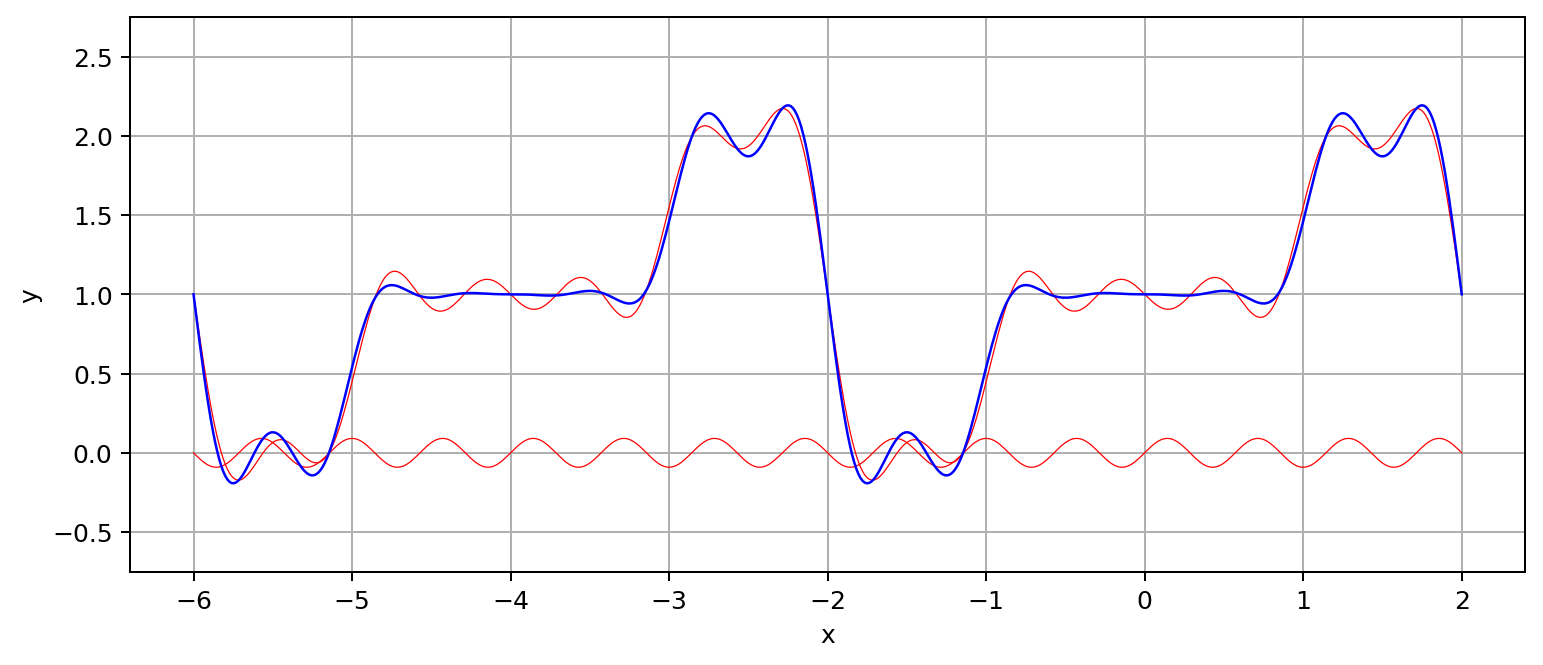

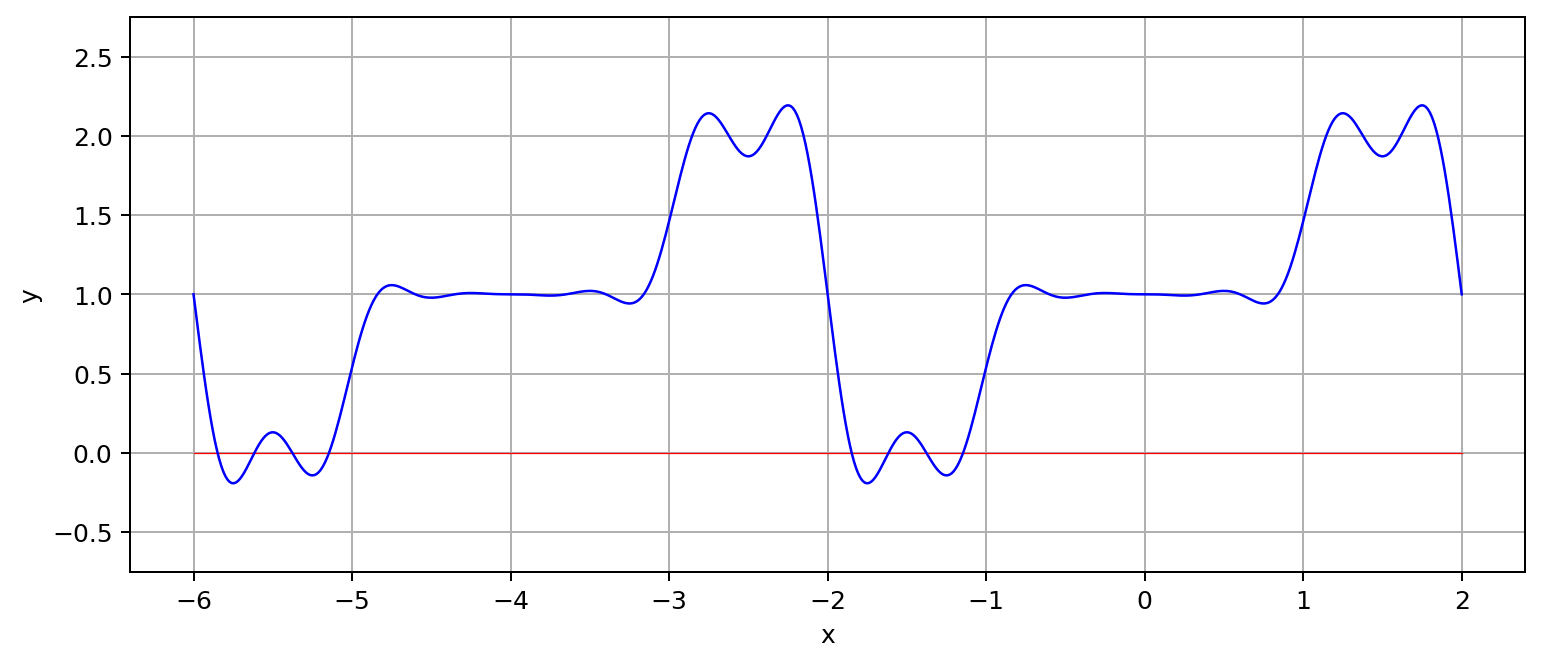

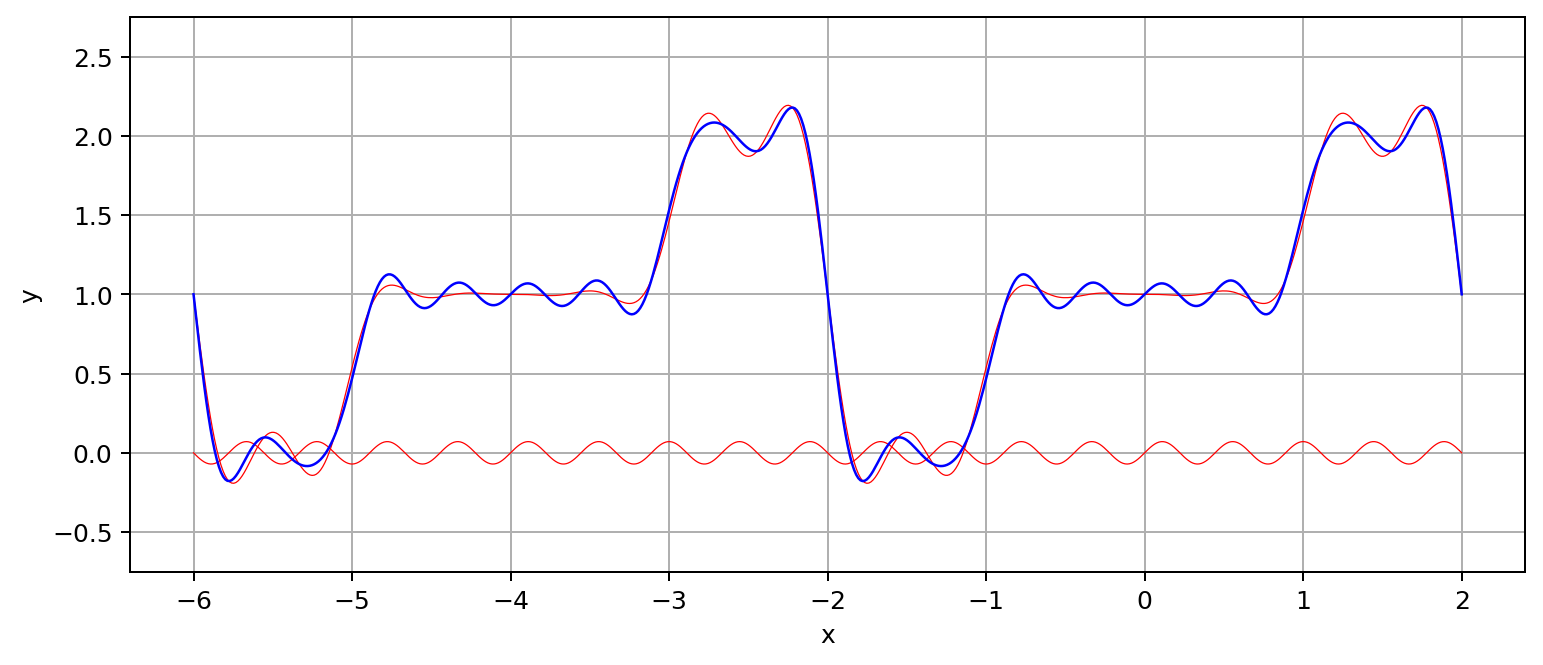

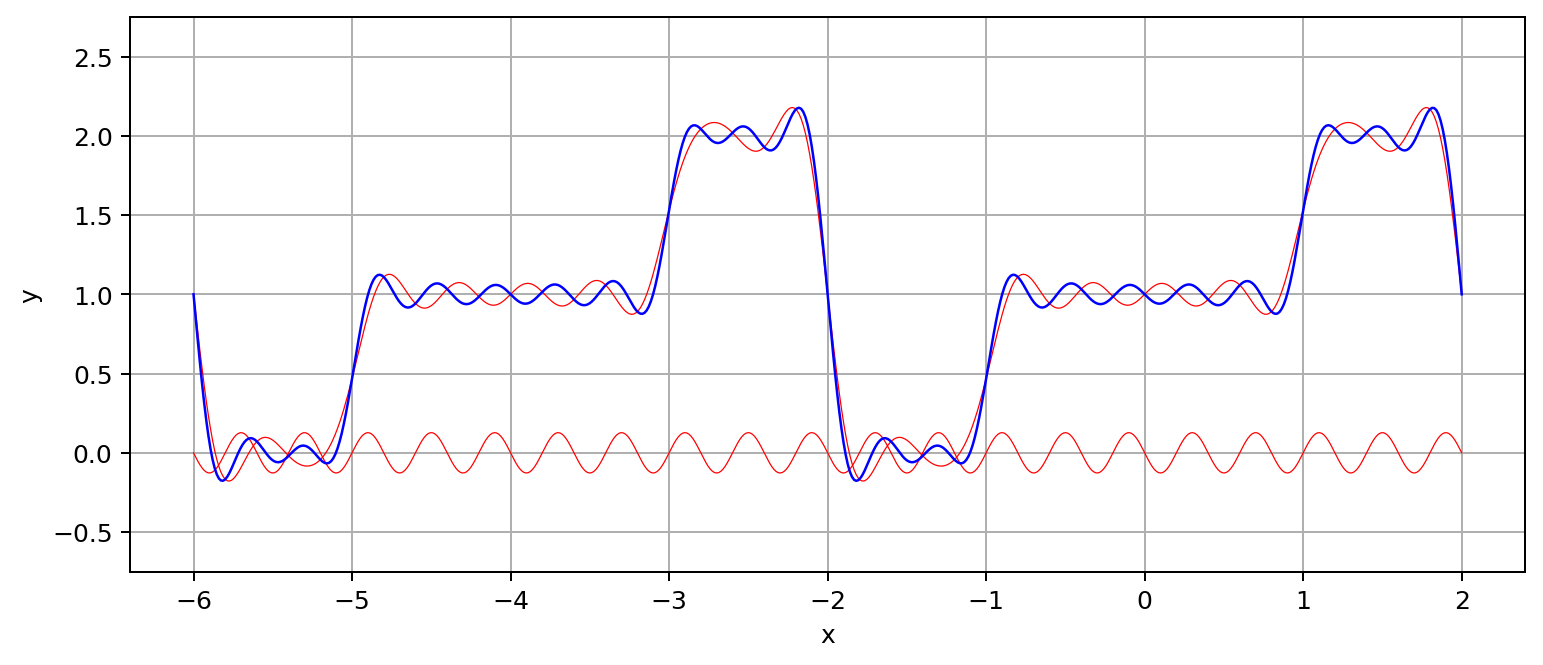

In [12]:
# @title $Commulative$

Y=np.zeros(len(X_fs))

figure(num=None, figsize=(10,4), dpi=180, facecolor='w', edgecolor='k')
Y=Y+a0/2
plt.plot(X_fs,Y, color='red',linewidth=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.axis('equal')
plt.grid()
plt.show()
#check=0
for i in range(len(a)):
    figure(num=None, figsize=(10,4), dpi=180, facecolor='w', edgecolor='k')
    plt.plot(X_fs,Y, color='red',linewidth=0.5)
    # if(check==0):
    #     Y=Y+a0/2
    #     plt.plot(X_fs,Y, color='red',linewidth=0.5)
    #     check=1

    Y1 = a[i]*np.cos(((i+1)*np.pi*X_fs)/float(L)) + b[i]*np.sin(((i+1)*np.pi*X_fs)/float(L))
    plt.plot(X_fs,Y1,linewidth=0.5, color='red')


    #figure(num=None, figsize=(5,2), dpi=200, facecolor='w', edgecolor='k')
    Y = Y + a[i]*np.cos(((i+1)*np.pi*X_fs)/float(L)) + b[i]*np.sin(((i+1)*np.pi*X_fs)/float(L))
    plt.plot(X_fs,Y,linewidth=1, color='blue')

    plt.xlabel("x")
    plt.ylabel("y")
    plt.axis('equal')
    plt.grid()
    plt.show()

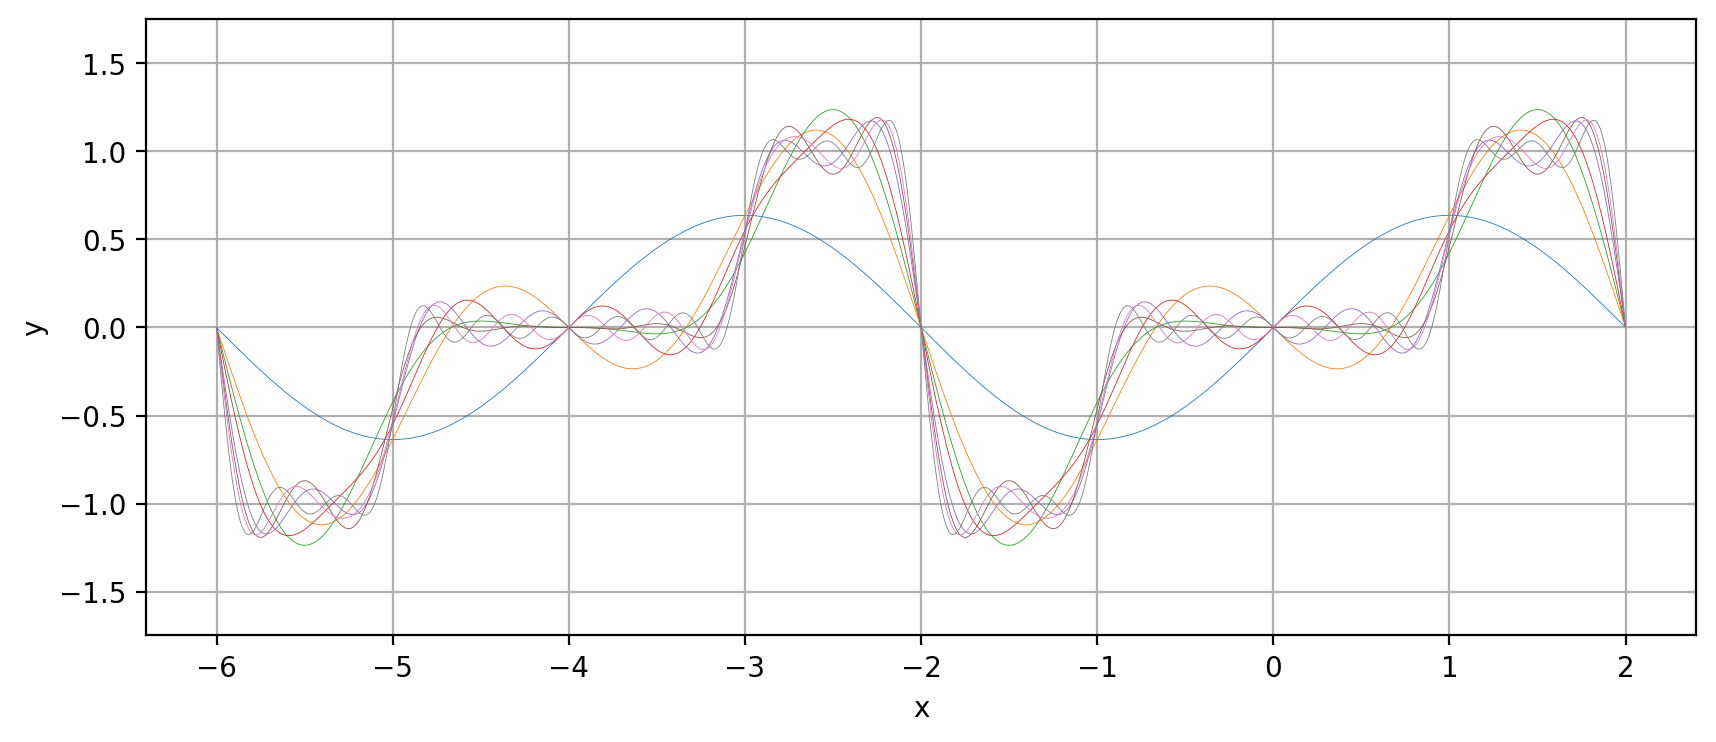

In [13]:
#@title $Graphical \ \ Representation \ \ of \ \ Sine \ \ Waves $

figure(num=None, figsize=(10,4), dpi=200, facecolor='w', edgecolor='k')
Y=np.zeros(len(X_fs))
for i in range(len(b)):
    if(b[i]!=0):
        Y = Y+ b[i]*np.sin(((i+1)*np.pi*X_fs)/float(L))
        plt.plot(X_fs,Y,linewidth=0.3)
plt.xlabel("x")
plt.ylabel("y")
plt.axis('equal')
plt.grid()
plt.show()

In [14]:
#@title $Fourier \ \ Series \ \ Representation$



F_series=0
for i in range(m):
    if(Fourier_Series_Type == "Full_Range"):
        F_series = F_series+sp.simplify((a[i]*sp.cos((i+1)*pi*x/L))+(b[i]*sp.sin((i+1)*pi*x/L)))
    elif(Fourier_Series_Type == "Half_Range_Cosine"):
        F_series = F_series+sp.simplify((a[i]*sp.cos((i+1)*pi*x/L)))
    elif(Fourier_Series_Type == "Half_Range_Sine"):
        F_series = F_series+sp.simplify((b[i]*sp.sin((i+1)*pi*x/L)))
F_series=sp.simplify(F_series)
F_series=sp.expand(F_series)
if(Fourier_Series_Type == "Full_Range"):
    if(str(F_series)[0] != '-'):
        display(Math(r'\large{ f(x) \approx'+sp.latex(sp.simplify(a0/2))+r'+'+sp.latex(F_series)+r"}"))
    else:
        display(Math(r'\large{ f(x) \approx'+sp.latex(sp.simplify(a0/2))+sp.latex(F_series)+r"}"))

elif(Fourier_Series_Type == "Half_Range_Cosine"):
    if(str(F_series)[0] != '-'):
        display(Math(r'\large{ f(x) \approx'+sp.latex(sp.simplify(a0))+r'+'+sp.latex(F_series)+r"}"))
    else:
        display(Math(r'\large{ f(x) \approx'+sp.latex(sp.simplify(a0))+sp.latex(F_series)+r"}"))

else:
    display(Math(r'\large{ f(x) \approx'+ sp.latex(F_series)+r"}"))

if(Fourier_Series_Type == "Full_Range"):
    F_series = F_series + (a0/2)
elif(Fourier_Series_Type == "Half_Range_Cosine"):
    F_series = F_series + a0


<IPython.core.display.Math object>